In [48]:
import pandas as pd
import numpy as np
import dabl

In [49]:
from sklearn.linear_model import LinearRegression
housing_data = pd.read_csv(r"C:\Users\MUSUNURI JANAKIRAM\Desktop\ram\123 AI course\Ram_practise\Ram_practise\California Housing Price Prediction\housing_data.csv")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from os import path
!pip install pandas openpyxl

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
print(housing_data.shape)
print(housing_data.dtypes)

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [52]:
print(housing_data.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [53]:
#check whether there are any missing values or null
plt.figure(figsize=(15,8))
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

C:\Users\MUSUNURI JANAKIRAM\AppData\Local\Temp\ipykernel_31280\610758632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

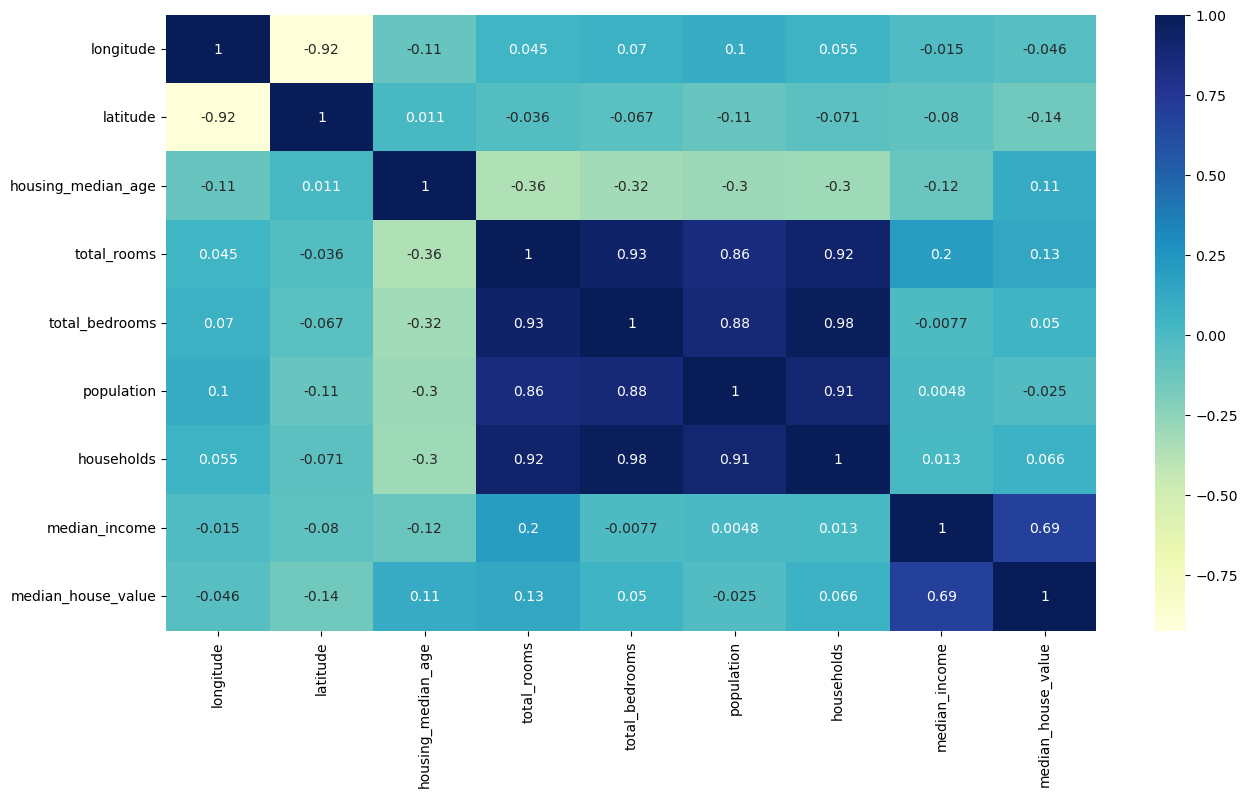

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_data.corr(),annot=True,cmap="YlGnBu")

# Simple Linear Regression with one variable (with correlation)

In [55]:
X = housing_data['median_income']
y = housing_data['median_house_value']
# Assumed that 'median income' is correlated with 'median house value' which is a target variable

In [56]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [57]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [58]:
# Print the model summary & evaluation metrics
print(model.summary())
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:43:55   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

# Interpretation in Simple Linear Regression:
- A higher R² value indicates that a larger portion of the variance in the housing prices can be explained by the median income.
  For example, an R² value of 0.47 means that only 47% of the variability in house prices is explained by the median income.
- MSE should always be minimal. This indicates that the models predictions are not closer to the actual value

# Multiple Linear Regression

In [59]:
#check whether there are any missing values or null
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [60]:
# dropping the null values
housing_data.dropna(inplace=True)

In [61]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [62]:
print(housing_data.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [63]:
# checking the column ocean_proximity as it is an object
housing_data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [64]:
# Applying one hot encoding on ocean proximity
housing_data = housing_data.join(pd.get_dummies(housing_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [65]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0          0   
1      2401.0      1138.0         8.3014            358500.0          0   
2       496.0       177.0         7.2574            352100.0          0   
3       558.0       219.0         5.6431            341300.0          0   
4       565.0       259.0         3.8462            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0       0         1           0  
2       0       0         1           0  
3       0       0         1           0  
4       0       0         1           0

<Axes: >

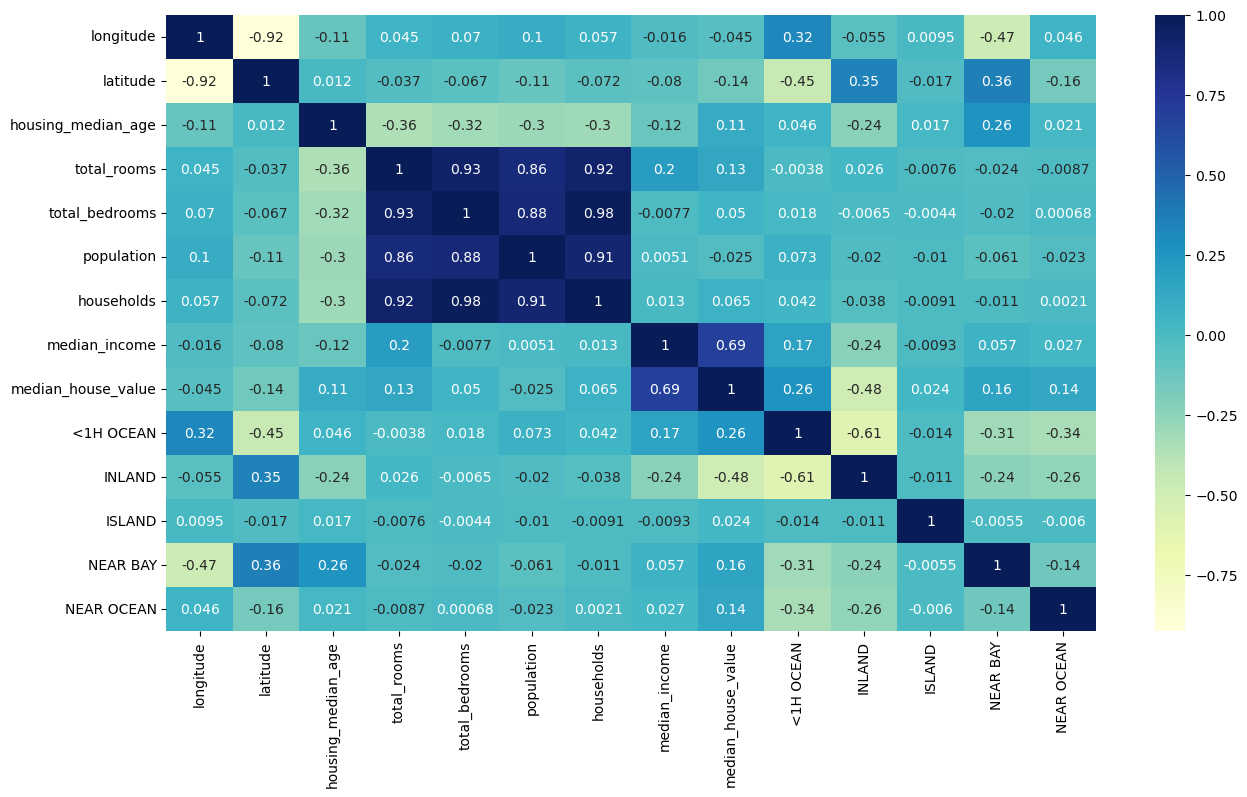

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_data.corr(),annot=True,cmap="YlGnBu")

In [67]:
# Data preprocessing
x = housing_data.drop(['median_house_value'],axis=1)
y = housing_data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape, x_test.shape)

(16346, 13) (4087, 13)


In [68]:
#Fitting a model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(x_test)

In [70]:
w = model.coef_
b = model.intercept_
print(w, b)

[-2.75418326e+04 -2.61409120e+04  1.10296101e+03 -6.79133004e+00
  1.06430379e+02 -3.59753125e+01  4.05599824e+01  3.95538741e+04
 -2.29888646e+04 -6.11631954e+04  1.29254399e+05 -2.73606554e+04
 -1.77416839e+04] -2313046.987430933


In [71]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6511506597122021 4727506412.235124


In [73]:
housing1_data = r"C:\Users\MUSUNURI JANAKIRAM\Desktop\ram\123 AI course\Ram_practise\Ram_practise\California Housing price prediction (All models)\housing_data.xlsx"

try:
    housing_data.to_excel(housing1_data, index=False)
    print(f"DataFrame successfully saved to {housing1_data}")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame successfully saved to C:\Users\MUSUNURI JANAKIRAM\Desktop\ram\123 AI course\Ram_practise\Ram_practise\California Housing price prediction (All models)\housing_data.xlsx
